In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
# 1. LOAD YOUR EXACT LENNA IMAGE
img_path = r"C:\Users\LENOVO\Downloads\Lenna_(test_image).png"  # RAW STRING HANDLES BACKSLASHES
original_img = Image.open(img_path).convert('L')  # CRITICAL: CONVERT TO GRAYSCALE
A = np.array(original_img)

print(f"✅ Loaded Lenna image. Shape: {A.shape}, Dtype: {A.dtype}")
print("Top-left pixel values (grayscale):")
print(A[:5, :5])  # Verify conversion worked

✅ Loaded Lenna image. Shape: (512, 512), Dtype: uint8
Top-left pixel values (grayscale):
[[162 162 162 161 162]
 [162 162 162 161 162]
 [162 162 162 161 162]
 [162 162 162 161 162]
 [162 162 162 161 162]]


In [4]:
# 2. SVD DECOMPOSITION (MAY TAKE 10-30 SECONDS FOR 512x512)
print("\n⏳ Performing SVD decomposition...")
U, S, Vt = np.linalg.svd(A, full_matrices=False)
print(f"U shape: {U.shape}, S shape: {S.shape}, Vt shape: {Vt.shape}")


⏳ Performing SVD decomposition...
U shape: (512, 512), S shape: (512,), Vt shape: (512, 512)


In [5]:
# 3. RECONSTRUCT FOR k=5,20,50,100
reconstructions = {}
for k in [5, 20, 50, 100]:
    print(f"🔧 Reconstructing with k={k}...")
    # Keep only top k singular values
    S_k = np.zeros_like(S)
    S_k[:k] = S[:k]
    
    # Matrix multiplication: U (512xk) @ diag(S_k) (kxk) @ Vt (kx512)
    recon = U @ np.diag(S_k) @ Vt
    
    # Fix pixel values (clip to 0-255 and convert to uint8)
    recon = np.clip(recon, 0, 255).astype(np.uint8)
    reconstructions[k] = recon

🔧 Reconstructing with k=5...
🔧 Reconstructing with k=20...
🔧 Reconstructing with k=50...
🔧 Reconstructing with k=100...



💾 Results saved to: C:\Users\LENOVO\Downloads\Lenna_SVD_Reconstruction.jpg


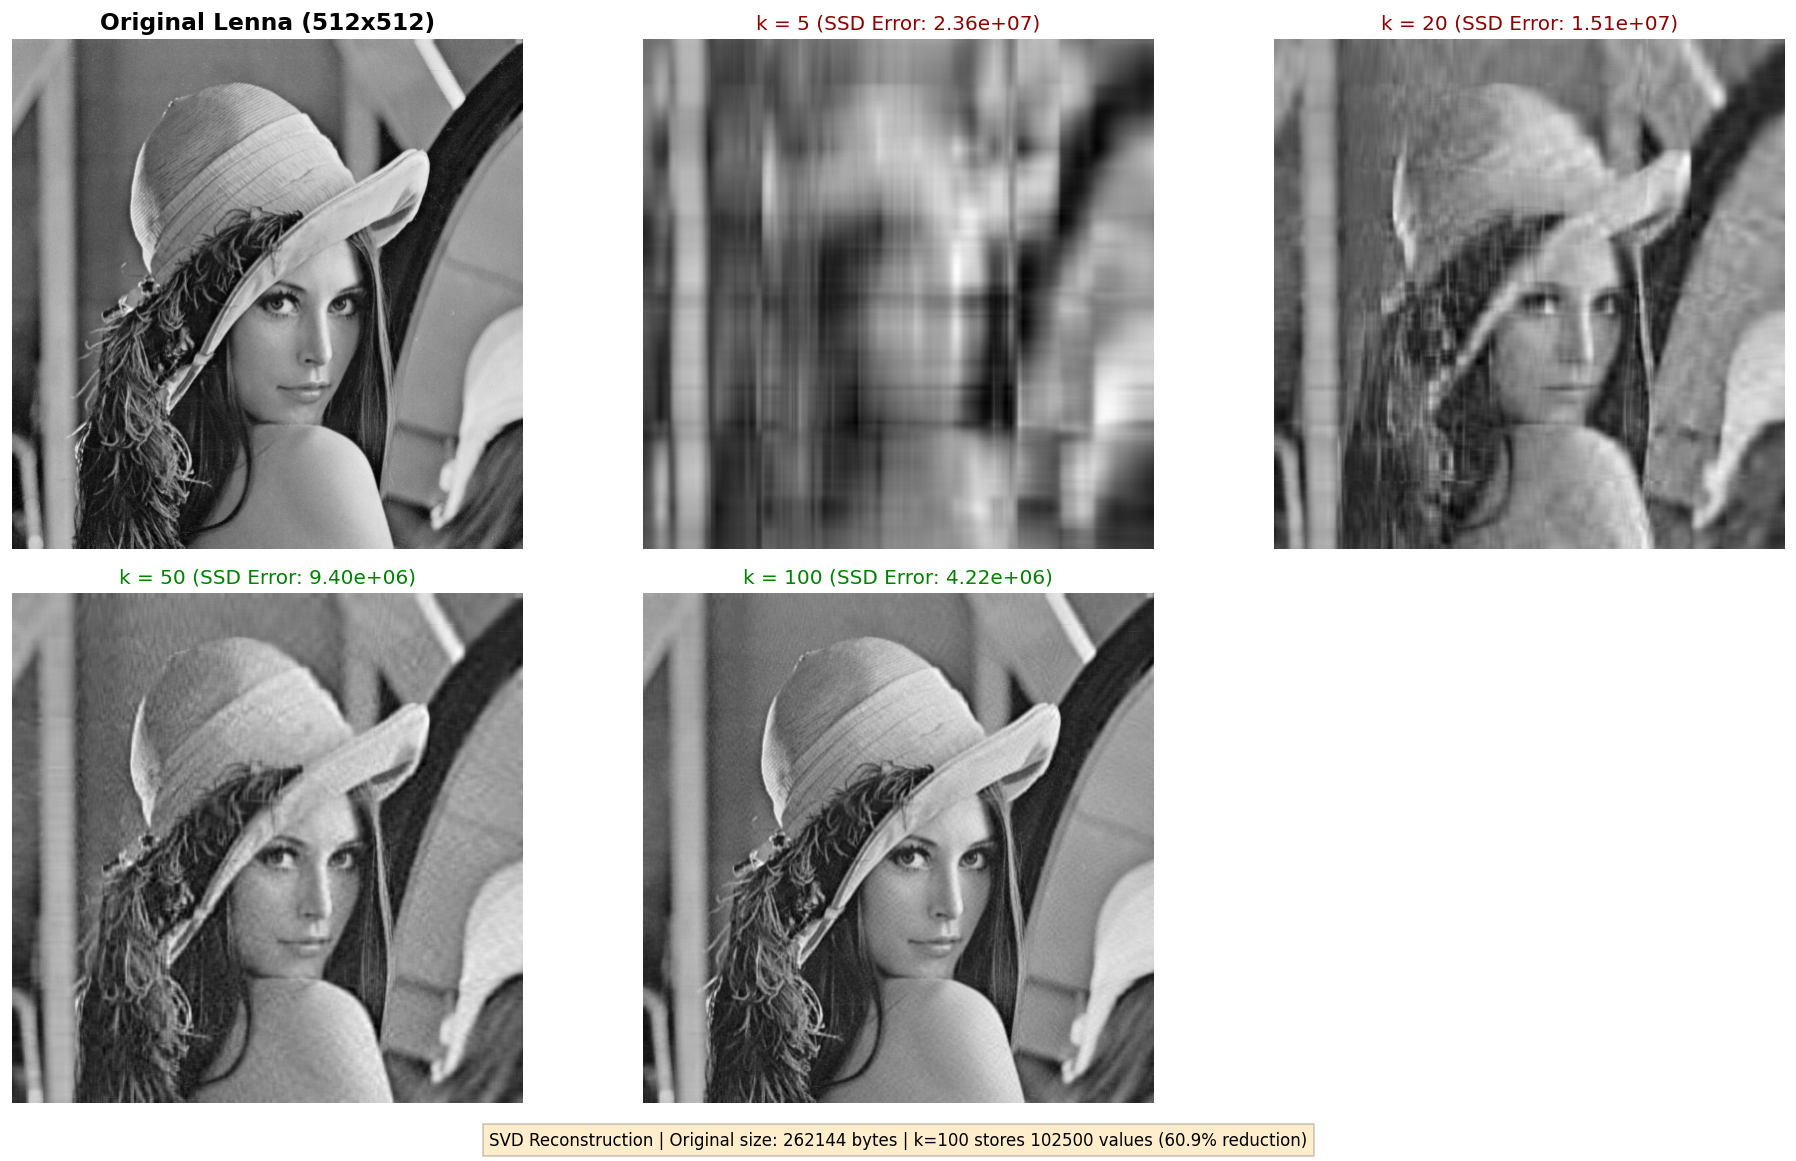

In [7]:
# 4. VISUALIZE RESULTS (PROFESSIONAL-QUALITY PLOT)
plt.figure(figsize=(16, 10), dpi=120)

# Original image
plt.subplot(2, 3, 1)
plt.imshow(A, cmap='gray')
plt.title(f'Original Lenna ({A.shape[0]}x{A.shape[1]})', fontsize=14, fontweight='bold')
plt.axis('off')

# Reconstructed images
for i, k in enumerate([5, 20, 50, 100], 2):
    plt.subplot(2, 3, i)
    plt.imshow(reconstructions[k], cmap='gray')
    plt.title(f'k = {k} (SSD Error: {np.sum((A - reconstructions[k])**2):.2e})', 
              fontsize=12, color='darkred' if k<50 else 'green')
    plt.axis('off')

# Add technical details in footer
plt.figtext(0.5, 0.01, 
            f"SVD Reconstruction | Original size: {A.size} bytes | k=100 stores {U[:, :100].size + 100 + Vt[:100, :].size} values ({(1 - (U[:, :100].size + 100 + Vt[:100, :].size)/A.size)*100:.1f}% reduction)",
            ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2})

plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Make room for footer
plt.savefig(r"C:\Users\LENOVO\Downloads\Lenna_SVD_Reconstruction.jpg", 
            bbox_inches='tight', dpi=150)
print("\n💾 Results saved to: C:\\Users\\LENOVO\\Downloads\\Lenna_SVD_Reconstruction.jpg")

plt.show()